<a href="https://colab.research.google.com/github/Zabihuddin/data_analysis/blob/main/4_tumor_images1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 0.7216 - val_accuracy: 0.5000 - val_loss: 0.8028
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5000 - loss: 0.7341 - val_accuracy: 0.5000 - val_loss: 0.7290
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.6250 - loss: 0.7365 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.5000 - loss: 0.9895 - val_accuracy: 0.5000 - val_loss: 0.6872
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6250 - loss: 0.5173 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7500 - loss: 0.5779 - val_accuracy: 0.5000 - val_loss: 0.7068
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step - accuracy: 0.2500 - loss: 1.1239 - val_accuracy: 0.5000 - val_loss: 0.7067
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.1250 - loss: 0.9715 - val_accuracy: 0.5000 - val_loss: 0.7024
Epoch 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



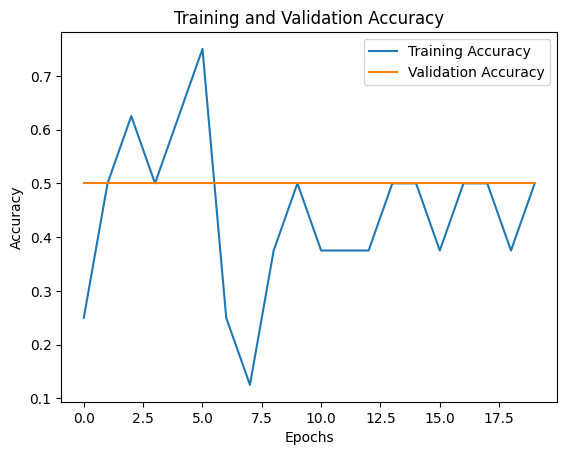

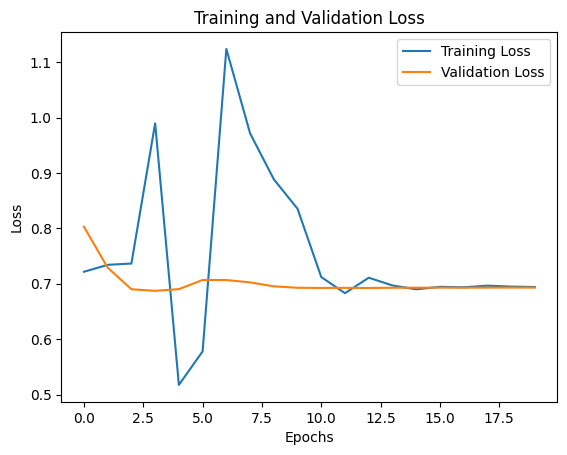

SSIM between images: 0.7559


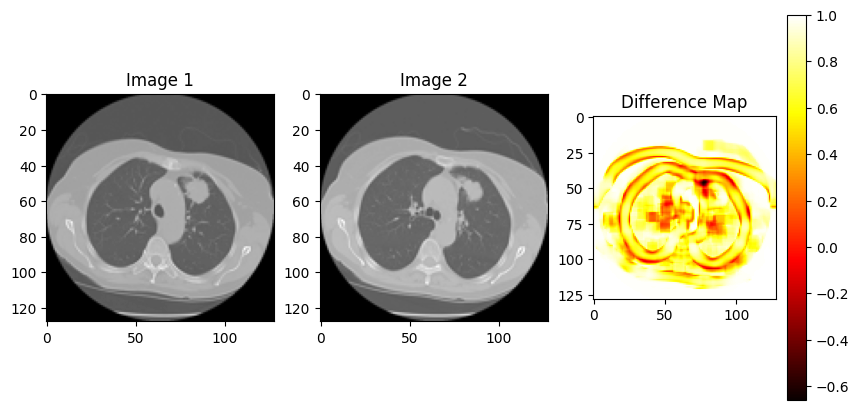

Similarity Index: 0.7559
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction for Image 1: Healthy
Prediction for Image 2: Healthy


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import structural_similarity as ssim  # For image similarity analysis
import cv2  # For image difference visualization

# Step 1: Load and preprocess images
image_dir = "/content/drive/MyDrive/Colab Notebooks/images/medical/z"
image_size = (128, 128)

if not os.path.exists(image_dir):
    raise FileNotFoundError(f"The directory '{image_dir}' does not exist.")

image_files = [file_name for file_name in os.listdir(image_dir) if file_name.endswith((".png", ".jpg", ".jpeg"))]
if not image_files:
    raise ValueError("No image files found in the specified directory.")

X = []
y = []

for i, file_name in enumerate(image_files):
    img_path = os.path.join(image_dir, file_name)
    img = Image.open(img_path).convert('L')
    img_resized = img.resize(image_size)
    X.append(np.array(img_resized) / 255.0)

    label = i % 2  # Synthetic labels for demonstration
    y.append(label)

X = np.array(X).reshape(-1, image_size[0], image_size[1], 1)
y = np.array(y)
y = to_categorical(y)

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Step 4: Define the CNN model
model = Sequential([
    Input(shape=(image_size[0], image_size[1], 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=16), validation_data=(X_test, y_test), epochs=20)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes, zero_division=0))

# Save the model
# Save the model
# Original: model.save("/mnt/data/segmentation_model.keras", save_format="keras")
model.save("/content/drive/MyDrive/Colab Notebooks/images/segmentation_model.keras", save_format="keras")  # Change the save path to a directory that exists within Google Drive.

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Step 7: Compare Two Images
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_resized = img.resize(image_size)
    img_normalized = np.array(img_resized) / 255.0
    return img_normalized

def compare_images(img1_path, img2_path):
    # Preprocess images
    img1 = preprocess_image(img1_path)
    img2 = preprocess_image(img2_path)

    # Compute Structural Similarity Index (SSIM)
    similarity_index, diff_map = ssim(img1, img2, full=True, data_range=1.0)  # Specify data_range for normalized images
    print(f"SSIM between images: {similarity_index:.4f}")

    # Visualize the difference map
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image 1")
    plt.imshow(img1, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("Image 2")
    plt.imshow(img2, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Difference Map")
    plt.imshow(diff_map, cmap='hot')
    plt.colorbar()
    plt.show()

    return similarity_index, diff_map

# Test: Compare two images
image1_path = "/content/drive/MyDrive/Colab Notebooks/images/medical/z/21.jpg"
image2_path = "/content/drive/MyDrive/Colab Notebooks/images/medical/z/23.jpg"

similarity_index, diff_map = compare_images(image1_path, image2_path)
print(f"Similarity Index: {similarity_index:.4f}")

# Step 8: Predict Disease Classification for Two Images
image1 = np.expand_dims(preprocess_image(image1_path), axis=(0, -1))
image2 = np.expand_dims(preprocess_image(image2_path), axis=(0, -1))

prediction1 = model.predict(image1)
prediction2 = model.predict(image2)

print(f"Prediction for Image 1: {'Diseased' if np.argmax(prediction1) == 1 else 'Healthy'}")
print(f"Prediction for Image 2: {'Diseased' if np.argmax(prediction2) == 1 else 'Healthy'}")


#Code # 2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.7006 - val_accuracy: 0.5000 - val_loss: 0.7071
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.3750 - loss: 0.9603 - val_accuracy: 0.5000 - val_loss: 0.6978
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 0.6250 - loss: 0.6740 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - accuracy: 0.6250 - loss: 0.6099 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - accuracy: 0.3750 - loss: 0.7666 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.3750 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step - accuracy: 0.3750 - loss: 0.7188 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step - accuracy: 0.3750 - loss: 0.7259 - val_accuracy: 1.0000 - val_loss: 0.6920
Epoch 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



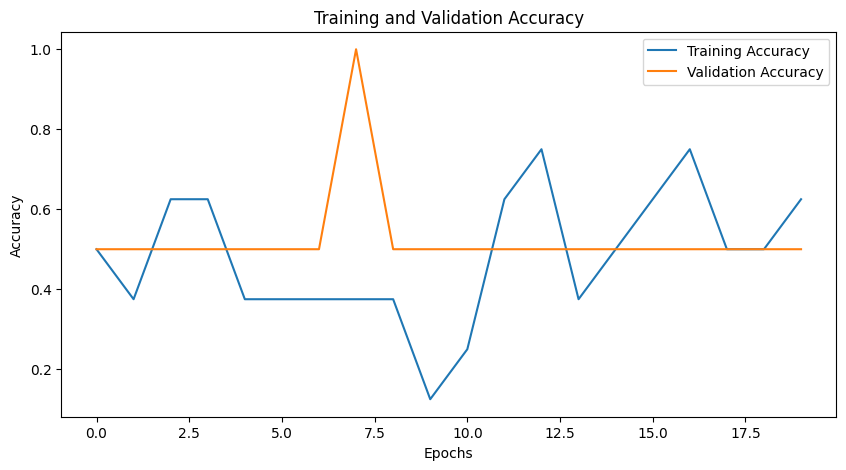

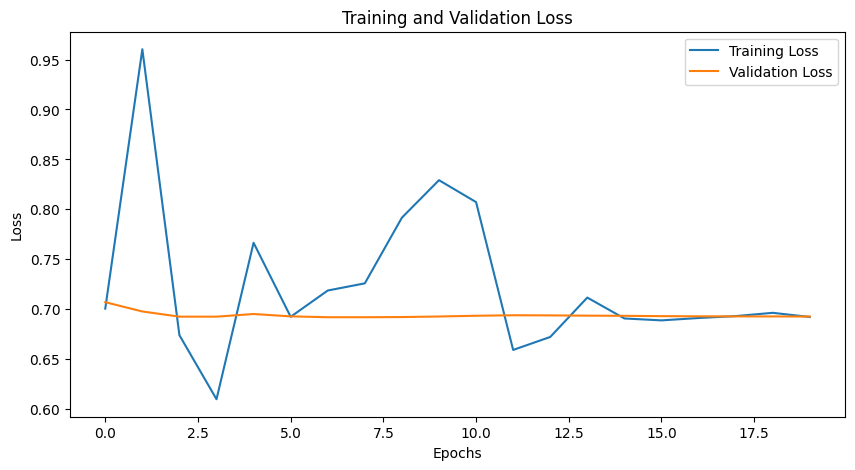

SSIM between images: 0.8930


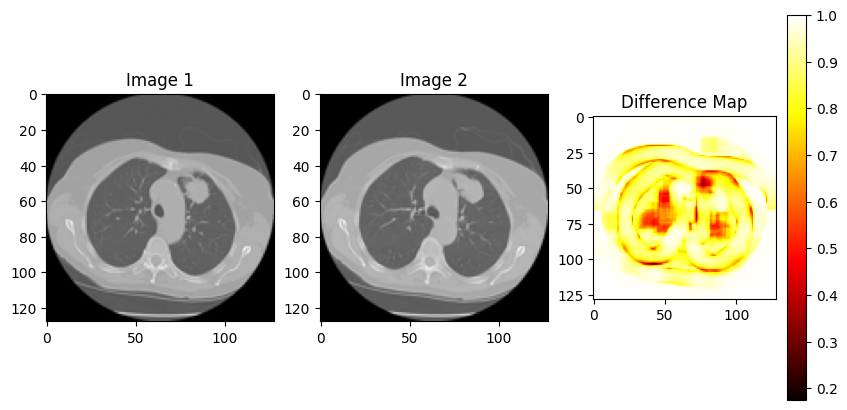

SSIM between images: 0.8998


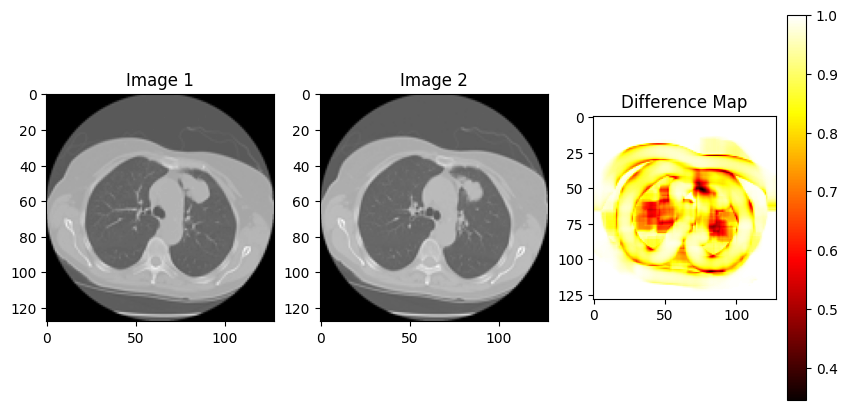

SSIM between images: 0.9107


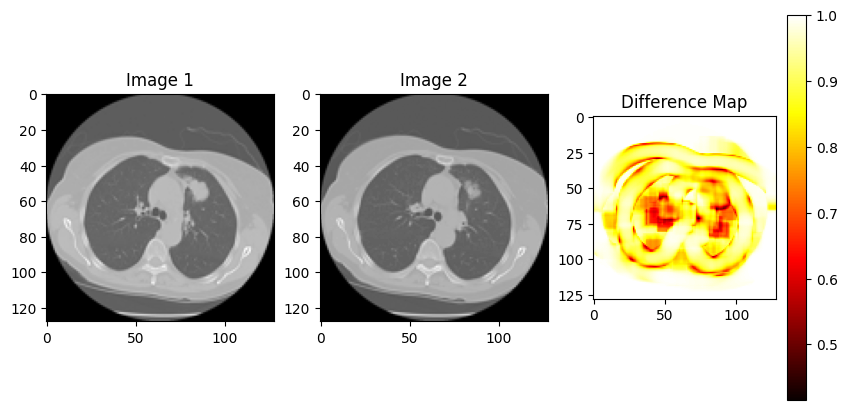

SSIM between images: 0.9103


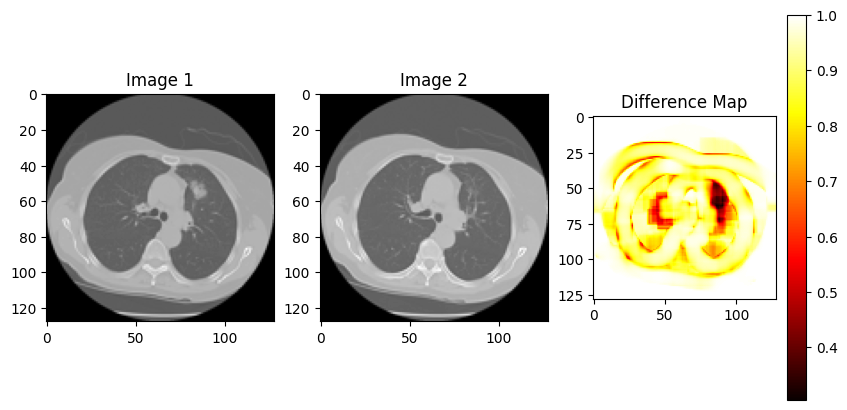

SSIM between images: 0.9176


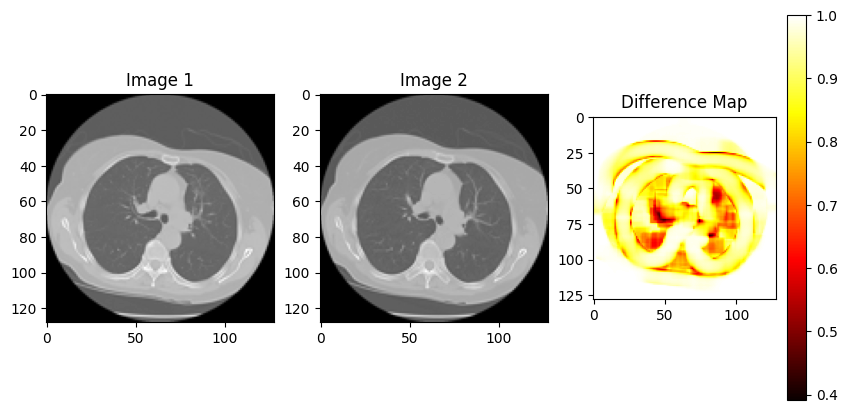

SSIM between images: 0.5848


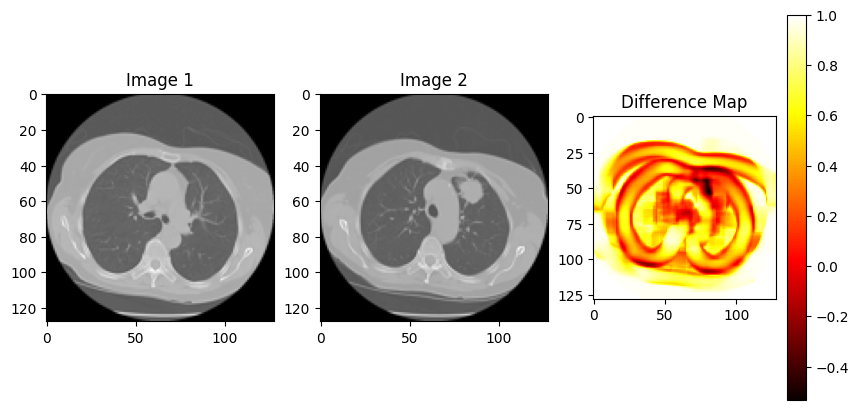

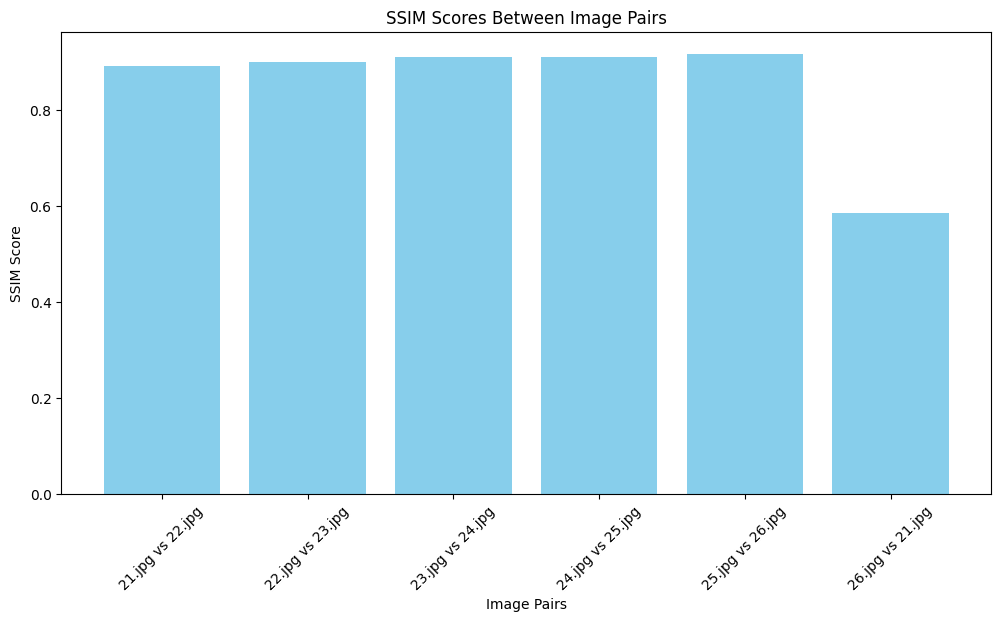

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction for 24 (1).jpg: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction for 23 (1).jpg: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction for 23.jpg: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction for 24.jpg: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for 21 (1).jpg: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction for 22 (1).jpg: Healthy


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
image_dir = "/content/drive/MyDrive/Colab Notebooks/images/medical/z"
graph_dir = "/content/drive/MyDrive/Colab Notebooks/graphs_data_saved"

# Ensure the graph directory exists
os.makedirs(graph_dir, exist_ok=True)

# Step 1: Load and preprocess images
image_size = (128, 128)

if not os.path.exists(image_dir):
    raise FileNotFoundError(f"The directory '{image_dir}' does not exist.")

image_files = [file_name for file_name in os.listdir(image_dir) if file_name.endswith((".png", ".jpg", ".jpeg"))]
if not image_files:
    raise ValueError("No image files found in the specified directory.")

X = []
y = []

for i, file_name in enumerate(image_files):
    img_path = os.path.join(image_dir, file_name)
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img_resized = img.resize(image_size)
    X.append(np.array(img_resized) / 255.0)  # Normalize

    label = i % 2  # Synthetic labels for demonstration
    y.append(label)

X = np.array(X).reshape(-1, image_size[0], image_size[1], 1)  # Add channel dimension
y = np.array(y)

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Step 4: Define a custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=16), validation_data=(X_test, y_test), epochs=20)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, zero_division=0))

# Save the model
model.save("/content/drive/MyDrive/Colab Notebooks/images/segmentation_model.keras", save_format="keras")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig(os.path.join(graph_dir, "training_validation_accuracy.png"))
plt.show()

# Extract loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig(os.path.join(graph_dir, "training_validation_loss.png"))
plt.show()

# Step 7: Compare multiple images using SSIM
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Grayscale for SSIM
    img_resized = img.resize(image_size)
    return np.array(img_resized) / 255.0

def compare_images(img1, img2):
    similarity_index, diff_map = ssim(img1, img2, full=True, win_size=11, data_range=1.0)
    print(f"SSIM between images: {similarity_index:.4f}")

    # Visualize difference map
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image 1")
    plt.imshow(img1, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("Image 2")
    plt.imshow(img2, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Difference Map")
    plt.imshow(diff_map, cmap='hot')
    plt.colorbar()
    plt.savefig(os.path.join(graph_dir, f"ssim_diff_{np.random.randint(1000)}.png"))
    plt.show()

    return similarity_index, diff_map

# Step 8: Test and compare six images
comparison_pairs = [
    ("21.jpg", "22.jpg"),
    ("22.jpg", "23.jpg"),
    ("23.jpg", "24.jpg"),
    ("24.jpg", "25.jpg"),
    ("25.jpg", "26.jpg"),
    ("26.jpg", "21.jpg")
]

ssim_scores = []
for img1_name, img2_name in comparison_pairs:
    img1_path = os.path.join(image_dir, img1_name)
    img2_path = os.path.join(image_dir, img2_name)

    img1 = preprocess_image(img1_path)
    img2 = preprocess_image(img2_path)

    similarity_index, _ = compare_images(img1, img2)
    ssim_scores.append((f"{img1_name} vs {img2_name}", similarity_index))

# Plot SSIM scores with custom color
ssim_labels, ssim_values = zip(*ssim_scores)
plt.figure(figsize=(12, 6))
plt.bar(ssim_labels, ssim_values, color='skyblue')  # Change 'skyblue' to your preferred color
plt.xlabel('Image Pairs')
plt.ylabel('SSIM Score')
plt.title('SSIM Scores Between Image Pairs')
plt.xticks(rotation=45)
plt.savefig(os.path.join(graph_dir, "ssim_scores.png"))
plt.show()

# Step 9: Predict disease classification for each image
for file_name in image_files[:6]:  # Limiting to first 6 images
    img_path = os.path.join(image_dir, file_name)
    img = preprocess_image(img_path).reshape(1, image_size[0], image_size[1], 1)
    prediction = model.predict(img)
    print(f"Prediction for {file_name}: {'Diseased' if prediction > 0.5 else 'Healthy'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


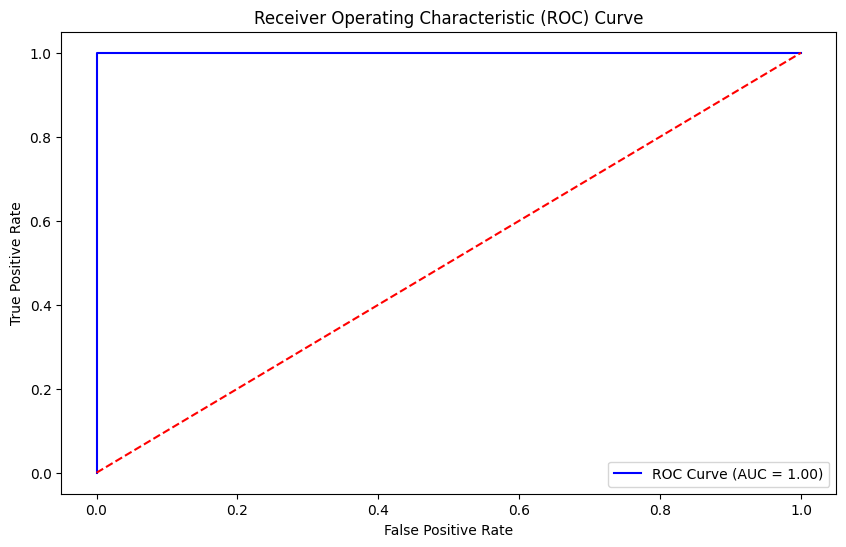

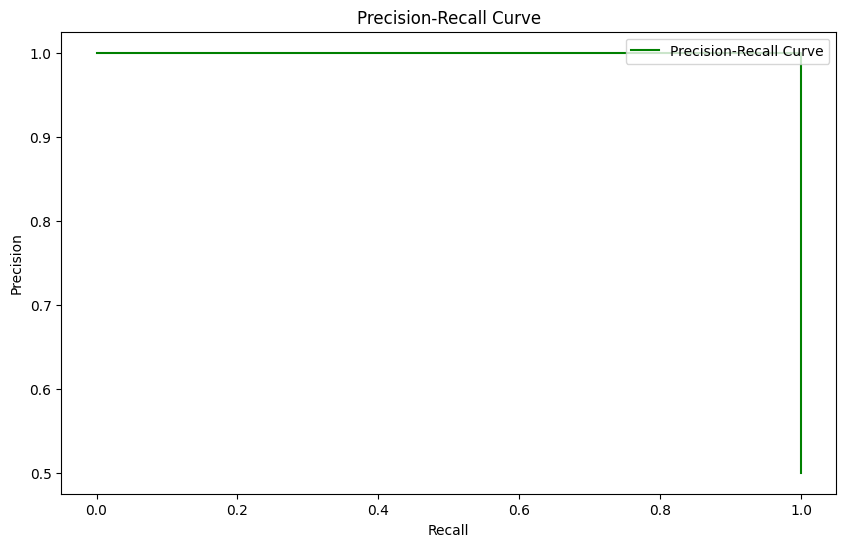

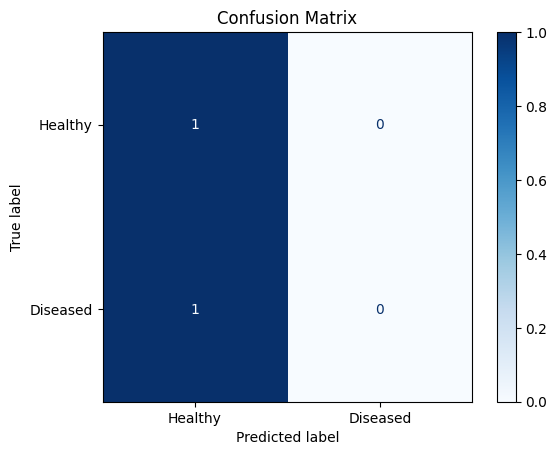

AUC-ROC: 1.00
Confusion Matrix:
[[1 0]
 [1 0]]


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# Step 10: AUC-ROC Curve
y_pred_prob = model.predict(X_test).ravel()  # Get probabilities
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Calculate FPR and TPR
roc_auc = auc(fpr, tpr)  # Compute AUC

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig(os.path.join(graph_dir, "auc_roc_curve.png"))
plt.show()

# Step 11: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.savefig(os.path.join(graph_dir, "precision_recall_curve.png"))
plt.show()

# Step 12: Confusion Matrix
y_pred_class = (y_pred_prob > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Healthy', 'Diseased'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(graph_dir, "confusion_matrix.png"))
plt.show()

# Step 13: Save Precision, Recall, FPR, TPR Data
np.save(os.path.join(graph_dir, "fpr.npy"), fpr)
np.save(os.path.join(graph_dir, "tpr.npy"), tpr)
np.save(os.path.join(graph_dir, "precision.npy"), precision)
np.save(os.path.join(graph_dir, "recall.npy"), recall)

# Summary of metrics
print(f"AUC-ROC: {roc_auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


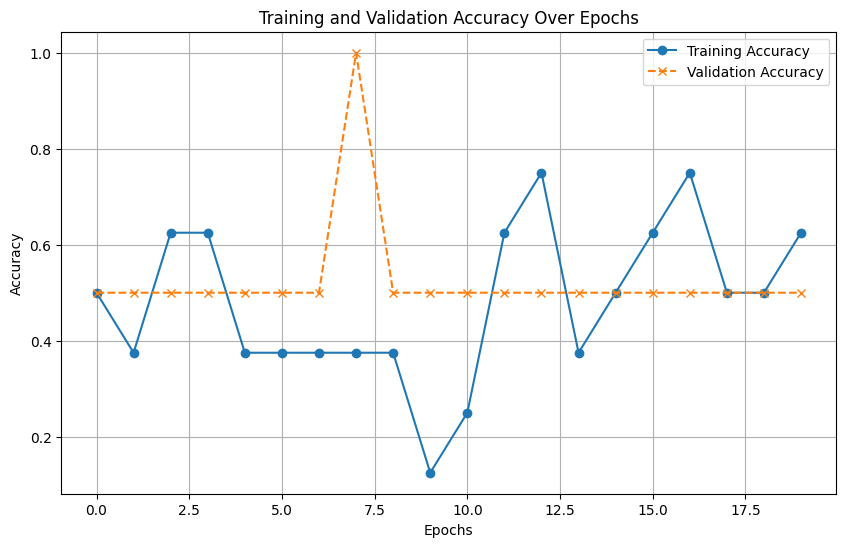

In [ ]:
# Step 14: Accuracy Graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(graph_dir, "accuracy_graph.png"))  # Save the graph
plt.show()
